In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
import warnings
from sklearn.metrics import r2_score
warnings.simplefilter(action='ignore', category=Warning)

In [17]:
df =pd.read_csv('/home/barbaros/Desktop/Aı/Startup/50_Startups.csv')
df=df.rename(columns ={'R&D Spend':'rd','Administration':'ad','Marketing Spend':'ms','State':'st','Profit':'pro'}, inplace =False)


In [18]:
dummies_list = ['st']
data=df.copy()

for x in dummies_list:
    temp_df=pd.get_dummies(eval('data'+'.'+x), drop_first=False)
    data=pd.concat([data, temp_df], axis=1)
    data.drop([x], axis=1, inplace=True)
data.columns=data.columns.str.lower()
data.head()

,rd,ad,ms,pro,california,florida,new york
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [19]:
cols=data.columns.values.tolist()
cols

['rd', 'ad', 'ms', 'pro', 'california', 'florida', 'new york']

In [20]:
data=data.rename(columns={'new york':'newyork'},inplace=False)
cols=data.columns.values.tolist()
cols

['rd', 'ad', 'ms', 'pro', 'california', 'florida', 'newyork']

In [21]:
data, test=train_test_split(data,test_size=0.1)
x_df_test=test.drop('pro',axis=1)
y_df_test=test['pro']

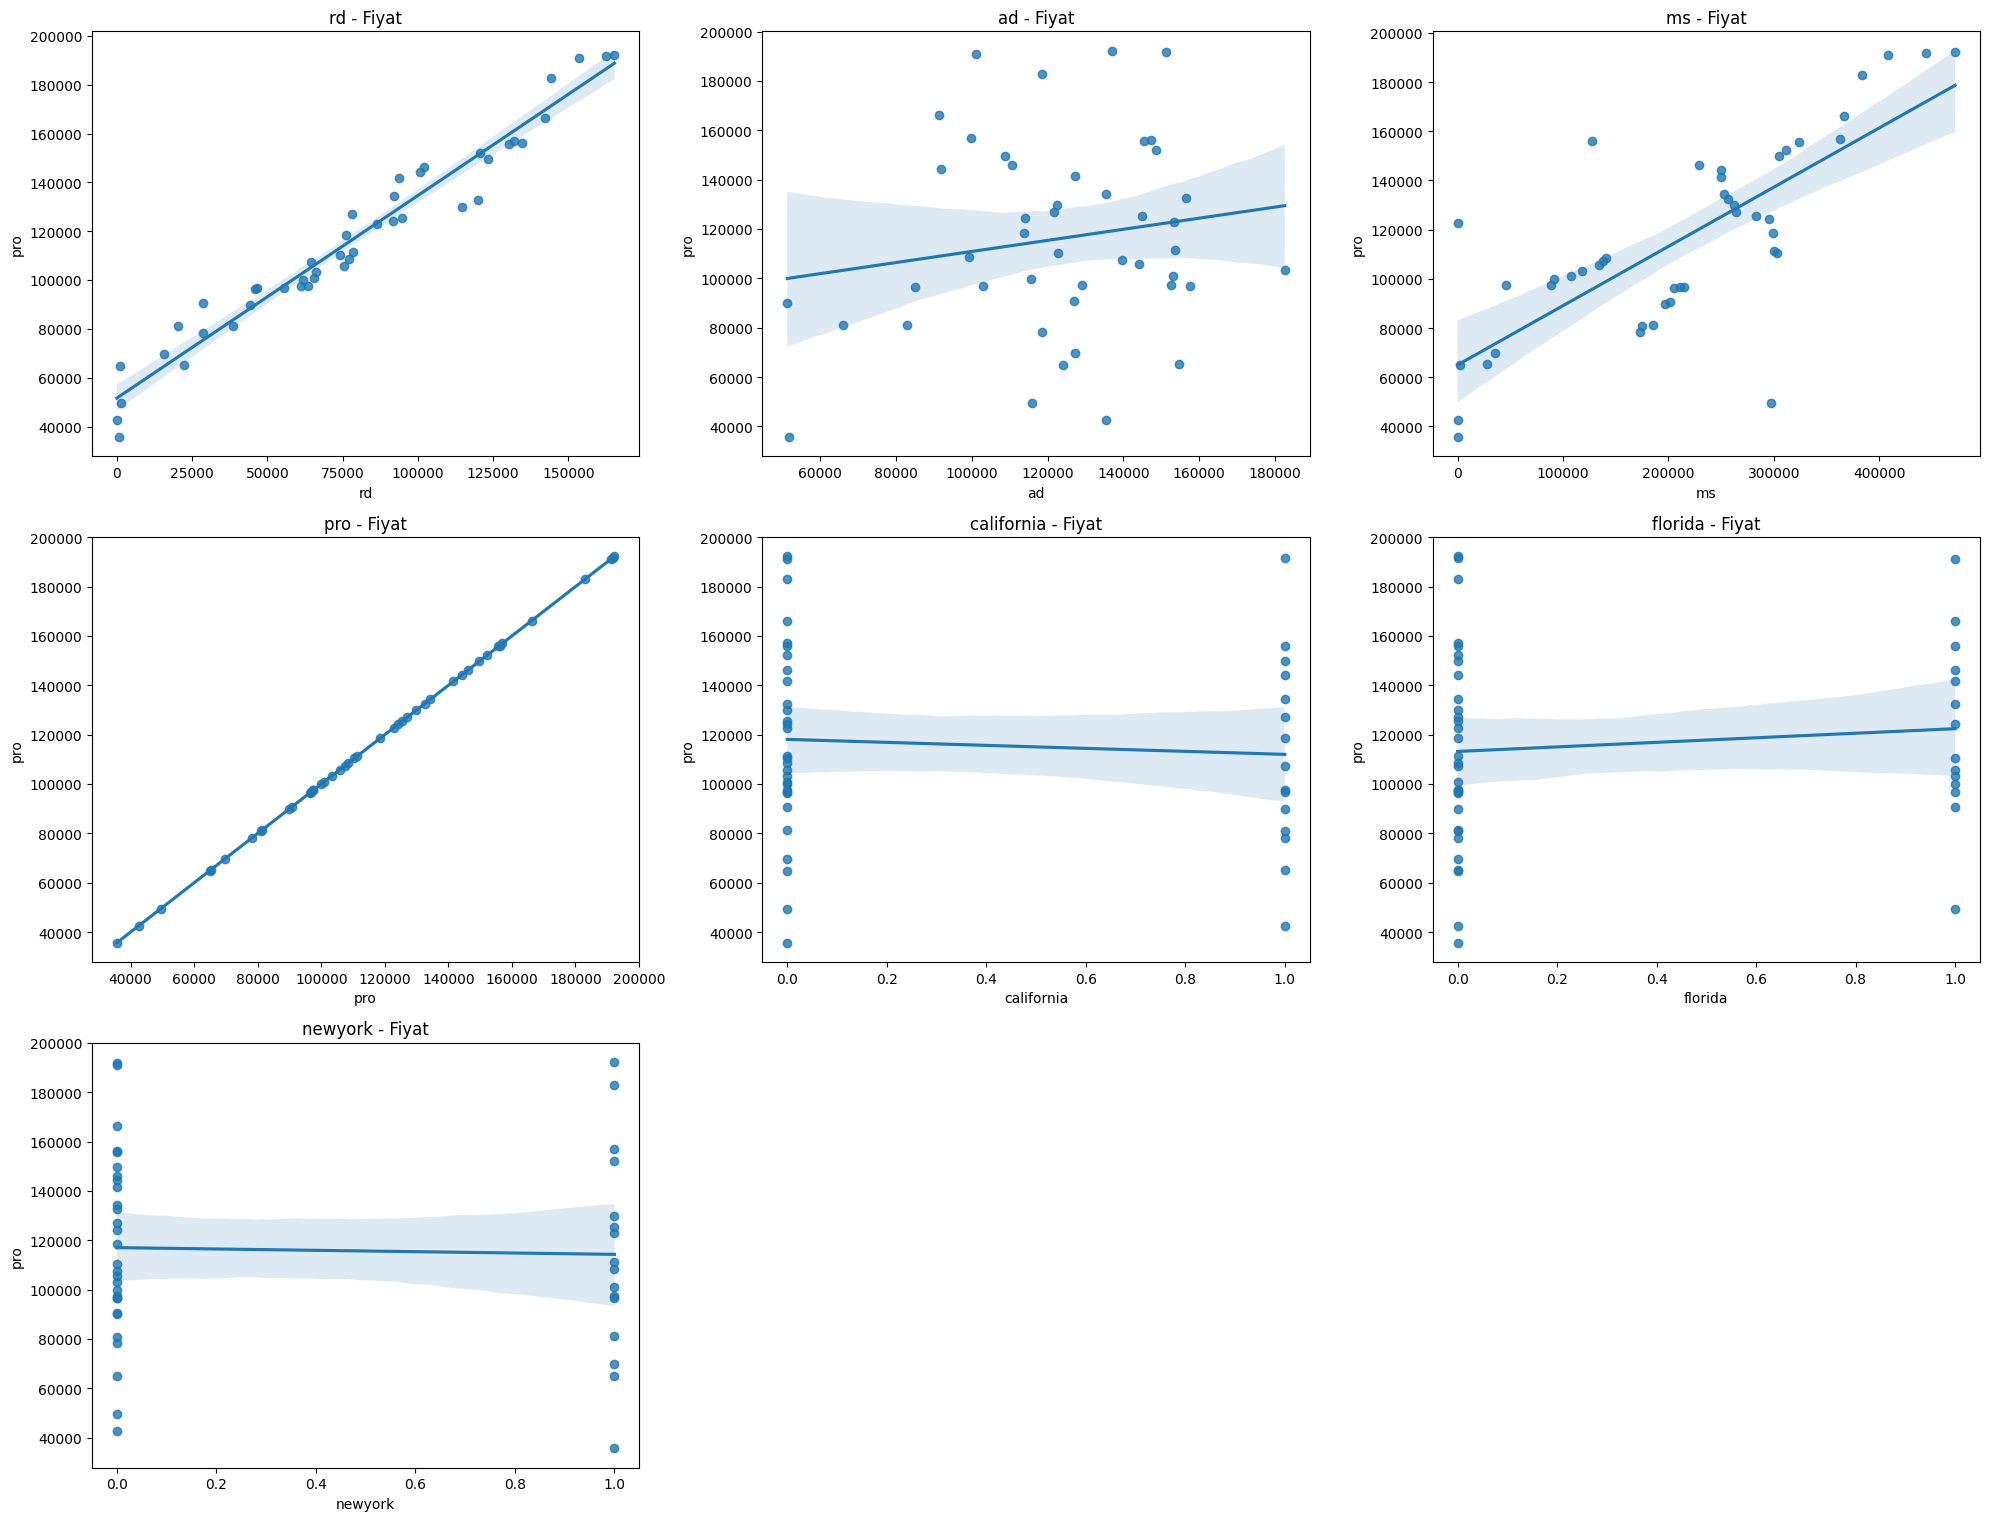

In [22]:
plt.figure(figsize=(20,25))

for i in range(len(cols)):

    u=str(cols[i])
    plt.subplot(5,3,i+1)
    plt.title(cols[i] + ' - Fiyat')

    sns.regplot(x=data[u], y=data['pro'])
    
plt.tight_layout()

<AxesSubplot: >

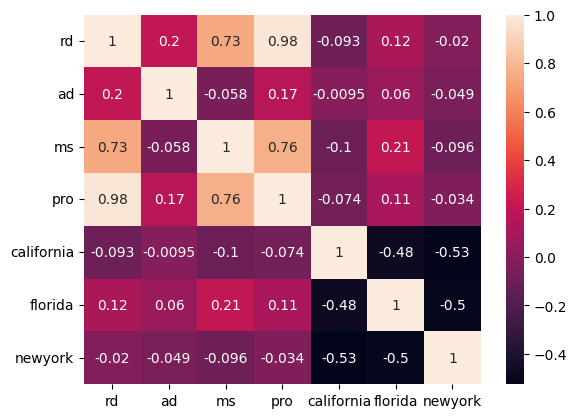

In [23]:
sns.heatmap(data.corr(),annot=True)

In [24]:
x=data.drop('pro',axis=1)
y=data['pro']
y=y.values.reshape(-1,1)
y.shape

(45, 1)

In [25]:
r2_l=[]
lis=[]

In [26]:
lr=LinearRegression()
for i in range (100):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3,random_state=i)
    lr=lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)
    a=r2_score(y_test,y_pred)
    k=(i,a)
    lis.append(k)

In [27]:
print(lis)

[(0, 0.9240373102153556), (1, 0.9425763992006729), (2, 0.9519239114460497), (3, 0.9656204991670247), (4, 0.9673074575506189), (5, 0.9317634049435521), (6, 0.9546925698327454), (7, 0.9403085307910476), (8, 0.9731591111743751), (9, 0.947840710826512), (10, 0.9647281972196035), (11, 0.9461404425358515), (12, 0.9551775751739986), (13, 0.9789555321704212), (14, 0.9585275116580928), (15, 0.9559423277309119), (16, 0.9143101757342555), (17, 0.9635205161049815), (18, 0.9522865163156632), (19, 0.9414363284884639), (20, 0.8877397677807662), (21, 0.9572535040348545), (22, 0.9556081442595535), (23, 0.9080462291500818), (24, 0.9381702856385833), (25, 0.9455349508460044), (26, 0.9629440270455736), (27, 0.9145330111989248), (28, 0.9261879531876894), (29, 0.9584695483947964), (30, 0.9004348593625505), (31, 0.9041412850606342), (32, 0.9661698537857201), (33, 0.8368284957749983), (34, 0.944872801040808), (35, 0.929921028729148), (36, 0.9574470005147752), (37, 0.9528894453522075), (38, 0.9512971491096067)

In [28]:
en_buyuk = lis[0][1]
en_kucuk = lis[0][1]
for n in lis:
  p=n
  n=n[1]
  if en_kucuk <n:
    en_kucuk=n
    k=p
print(k)
sayı=k[0]
print(sayı)

(13, 0.9789555321704212)
13


In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3,random_state=sayı)
lr=lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
y_df_pred=lr.predict(x_df_test)
y_pred.shape

(14, 1)

In [30]:
a=r2_score(y_test, y_pred)
b=r2_score(y_df_test, y_df_pred)

a

0.9789555321704212

In [31]:
b

0.7347478002484855